In [47]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from os import getcwd

In [51]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
  
    # Your code starts here
    labels = []
    images = []
    file = open(filename)


    for line in file.readlines():
        if line.startswith('label'): continue

        else:
            sp = line.split(",")
            labels.append(sp[0])

            images.append(np.array(sp[1:]).reshape(28, 28))

        # Your code ends here
        
    return np.array(images).astype('float'), np.array(labels).astype('float')

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

print(training_labels)
# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

[ 3.  6.  2. ... 18. 17. 23.]
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [52]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images.reshape(list(training_images.shape) + [1])
testing_images = testing_images.reshape(list(testing_images.shape) + [1])

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
   rotation_range = 40,
   width_shift_range = 0.2,
   height_shift_range = 0.2,
   shear_range = 0.2,
   zoom_range = 0.2,
   horizontal_flip = True
    )

validation_datagen = ImageDataGenerator(
    rescale = 1/255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

print(train_datagen)

# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    Conv2D(filters = 50, kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(filters = 100, kernel_size = (3,3), activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(0.4),
    Dense(512, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(26, activation = 'softmax')
])

# Compile Model. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64,
#     class_mode = 'categorical'
)

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64,
#     class_mode = 'categorical'
)

# Train the Model
history = model.fit_generator(train_gen,
                            epochs=2,
                            validation_data=val_gen)# Your Code Here (set 'epochs' = 2))

model.evaluate(testing_images, testing_labels)

Epoch 1/5
285/429 [==================>...........] - ETA: 18s - loss: 3.0101 - accuracy: 0.0961

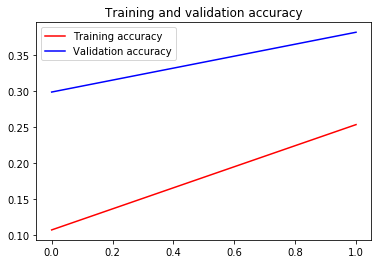

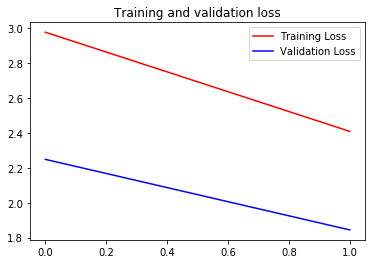

In [55]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);